In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample

from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as smt

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [33]:
#url="http://www.dataminingconsultant.com/data/churn.txt"
Tel_Churn = pd.read_csv("telecom_churn.csv")

Tel_Churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [34]:
Tel_Churn["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [35]:
Tel_Churn["International plan"] = np.where(Tel_Churn["International plan"] == " Yes " ,1,0).astype(int)
Tel_Churn["Voice mail plan"] = np.where(Tel_Churn["Voice mail plan"] == " Yes " ,1,0).astype(int)
Tel_Churn["Churn"] = np.where(Tel_Churn["Churn"] == True ,1,0).astype(int)

In [36]:
Tel_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int32
Voice mail plan           3333 non-null int32
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Ch

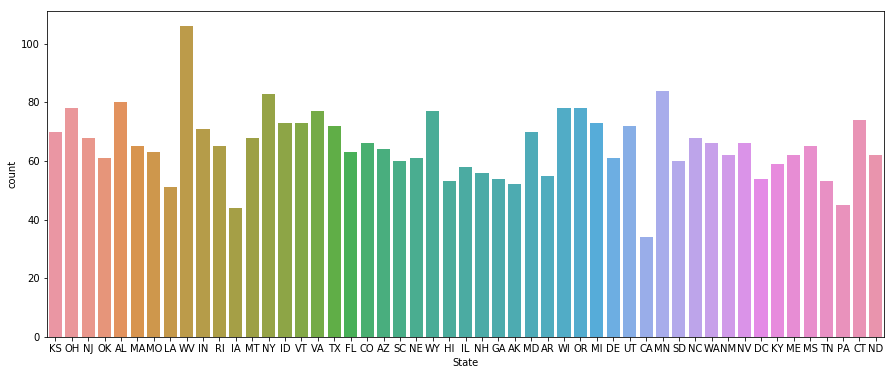

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x="State", data=Tel_Churn)

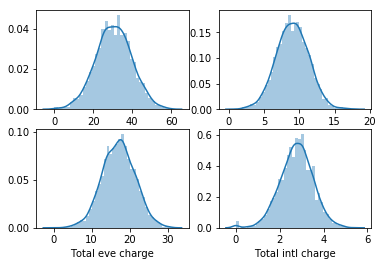

In [40]:
plt.subplot(221)
sns.distplot(Tel_Churn['Total day charge'])
plt.subplot(222)
sns.distplot(Tel_Churn['Total night charge'])
plt.subplot(223)
sns.distplot(Tel_Churn['Total eve charge'])
plt.subplot(224)
sns.distplot(Tel_Churn['Total intl charge'])
plt.show()

- Hence we can see, all the charges are following normal distribution

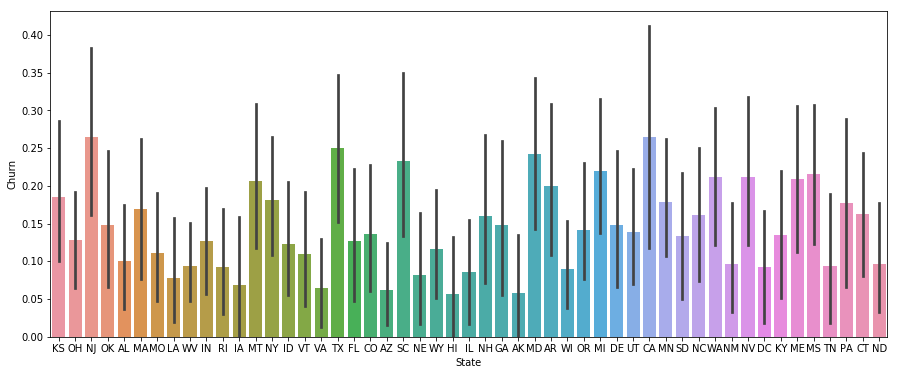

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x="State",y="Churn" ,data=Tel_Churn)

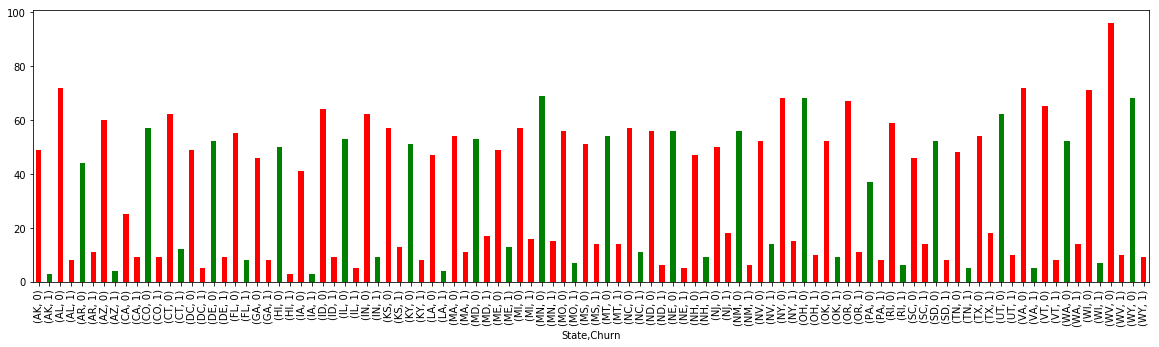

In [44]:
plt.figure(figsize=(20,5))
var = Tel_Churn.groupby(["State","Churn"]).Churn.count()
var.plot(kind="bar",color=["red","green"])

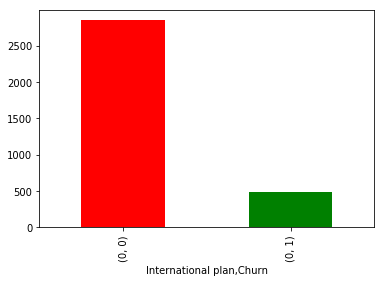

In [47]:
Int_Plan = Tel_Churn.groupby(["International plan","Churn"]).Churn.count()
Int_Plan.plot(kind="bar",color=["red","green"])

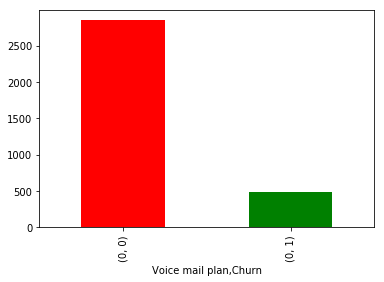

In [48]:
Vmail_Plan = Tel_Churn.groupby(["Voice mail plan","Churn"]).Churn.count()
Vmail_Plan.plot(kind="bar",color=["red","green"])

In [49]:
Tel_Churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [50]:
feature_cols =['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

X = Tel_Churn[feature_cols]
y = Tel_Churn.Churn

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3,random_state=44)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2333, 18)
(1000, 18)
(2333,)
(1000,)


# Modeling
Now we will build classification models using

- Logistic Regression
- KNN Classifier
- Decision Tree
- Gaussian Naive Bayes

# 1. Logistic Regression¶

In [55]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
print('The accuracy score for Logistic Regression model is %1.2f per cent' %((logreg.score(xtest,ytest))*100))

The accuracy score for Logistic Regression model is 87.50 per cent


# 2. KNN Classifier

In [57]:
sc = StandardScaler()
x_std = sc.fit_transform(X)

In [58]:
x_train_std = sc.fit_transform(xtrain)
x_test_std = sc.transform(xtest)

In [59]:
#For knn model we will first find out the best number of neighbors to be selected using grid search algorithm

knncl = KNeighborsClassifier()
param= {'n_neighbors': range(1,30)}
knngrid = GridSearchCV(knncl, param_grid= param, cv=5)
knngrid.fit(x_std,y) #for distance based model we use standardize values
knngrid.best_params_

{'n_neighbors': 5}

In [60]:
knncl = KNeighborsClassifier(n_neighbors=5)
knncl.fit(x_train_std,ytrain)
print('The accuracy score for KNN Classifier model is %1.2f per cent' %((knncl.score(x_test_std,ytest))*100))

The accuracy score for KNN Classifier model is 89.80 per cent


# 3. Decision Tree

In [61]:
#For decision tree we will again do the grid search for max depth, otherwise model will become over-fit

dtcl = DecisionTreeClassifier()
params= {'max_depth': np.arange(1,30)}
dtgrid= GridSearchCV(dtcl,params,cv=5)
dtgrid.fit(X,y)
dtgrid.best_params_

{'max_depth': 6}

In [62]:
dtcl = DecisionTreeClassifier(max_depth=6)
dtcl.fit(xtrain, ytrain)
print('The accuracy score for Decision Tree model is %1.2f per cent' %((dtcl.score(xtest,ytest)*100)))

The accuracy score for Decision Tree model is 89.90 per cent


# 4. Gaussian Naive Bayes

In [63]:
gnbcl = GaussianNB()
gnbcl.fit(xtrain, ytrain)
print('The accuracy score for Gaussian Naive Bayes model is %1.2f per cent' %((gnbcl.score(xtest,ytest)*100)))

The accuracy score for Gaussian Naive Bayes model is 88.60 per cent


# Model Comparison

### K-Fold Cross Validation

In [64]:
#We will perform this validation to check which model is workling consistently better among these four

models=[]
models.append(('Logistic Regression', logreg))
models.append(('Naive Bayes', gnbcl))
models.append(('KNeighbour',knncl))
models.append(('Decision Tree',dtcl))

In [65]:
results= []
names= []

for name,model in models:
    kfold= model_selection.KFold(n_splits = 10, random_state=44, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

Logistic Regression: 0.856569 (0.021782)
Naive Bayes: 0.881184 (0.011045)
KNeighbour: 0.870687 (0.015738)
Decision Tree: 0.916295 (0.006161)


# Ensemble Techniques

In ensemble techiques, we will make use following classification models:

- Random Forest Classifier
- Bagging Classifier
- Ada Boost Classifier
- Gradient Boost Classifier
- Voting Classifier
- XG Boosting Classifier

# 1. Random Forest Classifier

In [66]:
rfcl = RandomForestClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(rfcl, param_distributions=param, n_iter=80)
randomCV.fit(X,y)
randomCV.best_params_

{'n_estimators': 70}

In [67]:
rfcl = RandomForestClassifier(n_estimators=70)
rfcl.fit(xtrain, ytrain)
rfcl.score(xtest,ytest)

0.922

# 2. Bagging Classifier¶

In [68]:
bgcl = BaggingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(bgcl, param_distributions=param, n_iter=80)
randomCV.fit(X,y)
randomCV.best_params_

{'n_estimators': 70}

In [69]:
bgcl = BaggingClassifier(n_estimators=70)
bgcl.fit(xtrain, ytrain)
bgcl.score(xtest,ytest)

0.916

# 3. Ada Boost Classifier¶

In [70]:
abcl = AdaBoostClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(abcl, param_distributions=param, n_iter=80)
randomCV.fit(X,y)
randomCV.best_params_

{'n_estimators': 14}

In [71]:
abcl = AdaBoostClassifier(n_estimators=14)
abcl.fit(xtrain, ytrain)
abcl.score(xtest,ytest)

0.876

# 4. Gradient Boost Classifier

In [72]:
gbcl = GradientBoostingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(gbcl, param_distributions=param, n_iter=80)
randomCV.fit(X,y)
randomCV.best_params_

{'n_estimators': 77}

In [73]:
gbcl = GradientBoostingClassifier(n_estimators = 77)
gbcl.fit(xtrain,ytrain)
gbcl.score(xtest,ytest)

0.917

# 5. Voting Classifier

In [74]:
logreg = LogisticRegression()
knncl = KNeighborsClassifier(n_neighbors=5)
dtcl = DecisionTreeClassifier(max_depth=6)
gnbcl = GaussianNB()

vocl = VotingClassifier(estimators = [('log', logreg), ('KNN', knncl), ('Gaussian', gnbcl), ('DecisionTree', dtcl)], voting = 'hard')

In [75]:
vocl.fit(xtrain,ytrain)
vocl.score(xtest,ytest)

0.894

# 6. XG Boost Classifier

In [76]:
xgcl = xgb.XGBClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(xgcl, param_distributions=param, n_iter=80)
randomCV.fit(X,y)
randomCV.best_params_

{'n_estimators': 74}

In [77]:
xgcl = xgb.XGBClassifier(n_estimators=74)
xgcl.fit(xtrain, ytrain)
xgcl.score(xtest,ytest)

0.915

# Ensemble Model Comparision

### K-Fold Analysis

In [78]:
#We will perform this validation to check which model is workling consistently better among these four

models=[]
models.append(('Random Forest Classifier', rfcl))
models.append(('Bagging Classifier', bgcl))
models.append(('Ada Boosting Classifier',abcl))
models.append(('Gradient Boosting Classifier',gbcl))
models.append(('Voting Classifier',vocl))
models.append(('XG Boost Classifier',xgcl))

In [79]:
results= []
names= []

for name,model in models:
    kfold= model_selection.KFold(n_splits = 10, random_state=44, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

Random Forest Classifier: 0.923191 (0.009526)
Bagging Classifier: 0.921991 (0.008492)
Ada Boosting Classifier: 0.867682 (0.014716)
Gradient Boosting Classifier: 0.917200 (0.010687)
Voting Classifier: 0.881480 (0.016454)
XG Boost Classifier: 0.919001 (0.012085)


It is evident that the Random Forest Classifier is giving the better result among all six ensemble techniques. The accuracy is highest and standard deviation is lowest for Random Forest. So we will choose this ensemble technique to get best result on the given dataset of telecom churn analysis.